In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [4]:
df.drop(['mileage', 'make', 'model', 'hp'], axis = 1, inplace = True)

In [5]:
df.head()

,fuel,gear,offerType,price,year
0,Diesel,Manual,Used,6800,2011
1,Gasoline,Manual,Used,6877,2011
2,Gasoline,Manual,Used,6900,2011
3,Gasoline,Manual,Used,6950,2011
4,Gasoline,Manual,Used,6950,2011


In [6]:
df.fuel.unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [7]:
df.fuel = df.fuel.map({'Diesel' : 0, 'Gasoline' : 1, 'Electric/Gasoline' : 2, '-/- (Fuel)' : 3, 'Electric' : 4, 'Electric/Diesel' : 5, 'CNG' : 6, 'LPG' : 7, 'Others' : 8, 'Hydrogen' : 9, 'Ethanol' : 10})

In [8]:
df.gear.unique()

array(['Manual', 'Automatic', nan, 'Semi-automatic'], dtype=object)

In [9]:
df.gear = df.gear.map({'Manual' : 0, 'Automatic' : 1, 'Semi-automatic' : 2})
df['gear'] = df['gear'].fillna(df['gear'].mean())

In [10]:
df.offerType.unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

In [11]:
df.offerType = df.offerType.map({'Used' : 0, 'Demonstration' : 1, "Employee's car" : 2, 'Pre-registered' : 3, 'New' : 4})

In [13]:
df.describe()

,fuel,gear,offerType,price,year
count,46405.000000,46405.000000,46405.000000,4.640500e+04,46405.000000
mean,0.789053,0.343963,0.280228,1.657234e+04,2016.012951
std,0.837423,0.476640,0.782864,1.930470e+04,3.155214
min,0.000000,0.000000,0.000000,1.100000e+03,2011.000000
25%,0.000000,0.000000,0.000000,7.490000e+03,2013.000000
50%,1.000000,0.000000,0.000000,1.099900e+04,2016.000000
75%,1.000000,1.000000,0.000000,1.949000e+04,2019.000000
max,10.000000,2.000000,4.000000,1.199900e+06,2021.000000


In [14]:
corr = round(df.corr(), 4)
corr.style.background_gradient()

,fuel,gear,offerType,price,year
fuel,1.000000,-0.025500,0.129500,0.003800,0.126700
gear,-0.025500,1.000000,0.034100,0.427600,0.228900
offerType,0.129500,0.034100,1.000000,0.164400,0.512700
price,0.003800,0.427600,0.164400,1.000000,0.405600
year,0.126700,0.228900,0.512700,0.405600,1.000000


<Axes: >

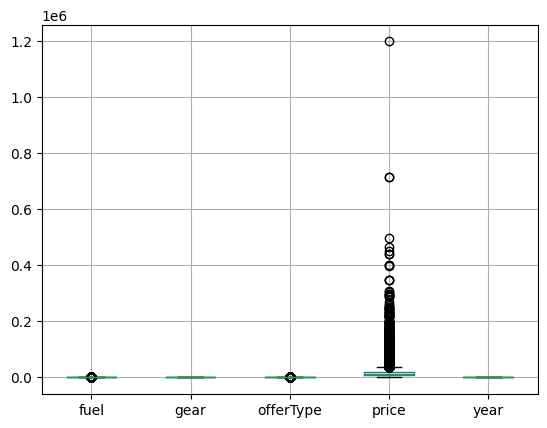

In [15]:
df.boxplot()

In [16]:
data_x = df.drop(['offerType'], axis = 1)
data_y = df.offerType

In [17]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.1)

In [18]:
neighbors_model = KNeighborsClassifier(n_neighbors = 8)

In [19]:
neighbors_model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=8)

In [20]:
y_predicted = neighbors_model.predict(test_x)

In [25]:
print(f'Score del modelo: {round(neighbors_model.score(test_x, test_y), 4) * 100}%')

Score del modelo: 87.37%


In [22]:
mode = ['None','Diesel', 'Gasolina', 'Electrico/Gasolina', '-/- (Fuel)', 'Electrico', 'Electrico/Diesel', 'CNG', 'LPG', 'Otro', 'Hidrogeno','Ethanol']
transmission = ['None', 'Manual', 'Automatico', 'Semi-automatico']
state = ['Usado', 'Demostración', "Auto del Empleado", 'Pre-registrado', 'Nuevo']


def vehicles_predict (model, fuel, gear, price, year):
    result = model.predict([[fuel, gear, price, year]])
    print(f'El auto que funciona a {mode[fuel]}, es de transmisión {transmission[gear]}, es un auto {state[result[0]]}')

In [24]:
vehicles_predict(neighbors_model, 1, 2 , 7000, 2011)

El auto que funciona a Diesel, es de transmisión Automatico, es un auto Usado


c:\Users\Personal\OneDrive\Escritorio\Algoritmica Avanzada\pandas_intro\pandas_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
